<a href="https://colab.research.google.com/github/Prajwal-ak-0/AI/blob/master/GenBootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to `Fasttext` and `gensim` library

In [1]:
from gensim.models import KeyedVectors

# Load the word embeddings
word_vectors = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/wiki-news-300d-1M.vec')

In [2]:
# Get the vector corresponding to a word
vector = word_vectors['beautiful']
print("Word Vector for 'beautiful':", vector)


Word Vector for 'beautiful': [ 7.470e-02 -1.296e-01 -1.280e-02 -7.950e-02 -3.080e-02  3.100e-02
 -8.310e-02  1.055e-01 -1.157e-01  1.269e-01 -2.230e-02 -6.670e-02
  2.100e-03 -1.243e-01  8.000e-02  6.680e-02  9.140e-02 -7.920e-02
  1.080e-02 -1.228e-01 -5.720e-02  4.320e-02  5.340e-02  1.008e-01
 -3.380e-02  5.280e-02 -6.140e-02 -1.515e-01  6.200e-03 -2.870e-02
 -1.080e-02  2.700e-02  8.790e-02 -2.230e-02  2.610e-02 -6.160e-02
 -7.820e-02 -4.470e-02 -8.000e-03  2.000e-04  1.244e-01 -4.180e-02
 -2.930e-02 -1.095e-01 -6.000e-04 -2.820e-02  1.260e-02 -1.180e-01
 -1.065e-01 -4.910e-02 -3.510e-02 -4.680e-02 -7.274e-01  6.710e-02
 -5.510e-02 -9.840e-02 -1.490e-01  8.370e-02 -3.700e-03  6.160e-02
  1.501e-01 -1.293e-01  4.070e-02 -3.700e-02 -3.660e-02 -1.323e-01
  1.422e-01  9.900e-02  6.340e-02 -2.420e-02  8.870e-02  6.560e-02
 -5.830e-02  4.280e-02 -2.440e-02 -4.710e-02 -1.950e-02 -3.720e-02
 -5.220e-02 -1.610e-02  3.480e-02  3.960e-02 -8.730e-02 -1.649e-01
 -6.670e-02  2.210e-02  3.370e-02

In [3]:
# Finding the similar words
similar_words = word_vectors.similar_by_word("beautiful", topn=5)
print("\nTop 5 words similar to 'beautiful':", similar_words)


Top 5 words similar to 'beautiful': [('gorgeous', 0.8433856964111328), ('lovely', 0.8281809687614441), ('charming', 0.7809241414070129), ('magnificent', 0.7750603556632996), ('wonderful', 0.753922164440155)]


In [4]:
# Finding the odd one out
odd_one_out = word_vectors.doesnt_match(["wicket", "bat", "ball", "stumps", "lunch"])
print("\nWord that doesn't match:", odd_one_out)


Word that doesn't match: lunch


In [5]:
# Calculating the similarity between words
similarity = word_vectors.similarity('woman', 'man')
print("\nSimilarity between 'night watchman' and 'man':", similarity)


Similarity between 'night watchman' and 'man': 0.81645226


In [6]:
# Resulting word from the the combination

resulting_word = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)
print("\nResulting word 'woman' : 'man' :: 'king' :: ? :", resulting_word)


Resulting word 'woman' : 'man' :: 'king' :: ? : [('queen', 0.751591145992279), ('monarch', 0.6741327047348022), ('princess', 0.6713886857032776)]


In [7]:
# Check if a word is in the vocabulary
word = 'tennis'
if word in word_vectors:
    print(f"\n'{word}' is in the vocabulary.")
else:
    print(f"\n'{word}' is not in the vocabulary.")


'tennis' is in the vocabulary.


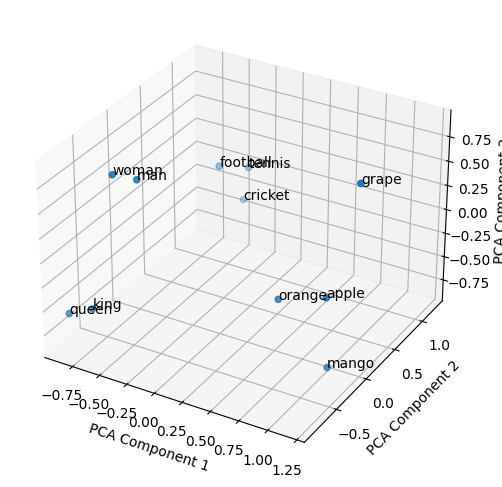

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

words = ['king', 'queen', 'man', 'woman', 'apple', 'orange', 'mango', 'grape', 'cricket', 'football', 'tennis']

word_vecs = []

for word in words:
  word_vector = word_vectors[word]
  word_vecs.append(word_vector)

pca = PCA(n_components=3)
result = pca.fit_transform(word_vecs)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(result[:, 0], result[:, 1], result[:, 2])

for i, word in enumerate(words):
    ax.text(result[i, 0], result[i, 1], result[i, 2], word)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

In [9]:
from sklearn.cluster import KMeans
import numpy as np

# List of words to cluster
words = ['king', 'queen', 'man', 'woman', 'apple', 'orange', 'breakfast', 'dinner']
word_vecs = [word_vectors[word] for word in words]

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(word_vecs)
labels = kmeans.labels_

# Print the clusters
cluster_1 = [words[i] for i in range(len(words)) if labels[i] == 0]
cluster_2 = [words[i] for i in range(len(words)) if labels[i] == 1]
print("\nCluster 1:", cluster_1)
print("Cluster 2:", cluster_2)



Cluster 1: ['king', 'queen', 'man', 'woman', 'apple', 'orange']
Cluster 2: ['breakfast', 'dinner']


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Sentiment Analysis Problem

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/drive/MyDrive/train1.csv', encoding='latin-1')
dataset.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [12]:
dataset = dataset[['text', 'sentiment']]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27481 non-null  object
dtypes: object(2)
memory usage: 429.5+ KB


In [13]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27480 non-null  object
dtypes: object(2)
memory usage: 644.1+ KB


In [14]:
dataset.describe()

,text,sentiment
count,27480,27480
unique,27480,3
top,"I`d have responded, if I were going",neutral
freq,1,11117


In [15]:
X = dataset['text']
y = dataset['sentiment']
X,y

(0                      I`d have responded, if I were going
 1            Sooo SAD I will miss you here in San Diego!!!
 2                                my boss is bullying me...
 3                           what interview! leave me alone
 4         Sons of ****, why couldn`t they put them on t...
                                ...                        
 27476     wish we could come see u on Denver  husband l...
 27477     I`ve wondered about rake to.  The client has ...
 27478     Yay good for both of you. Enjoy the break - y...
 27479                           But it was worth it  ****.
 27480       All this flirting going on - The ATG smiles...
 Name: text, Length: 27480, dtype: object,
 0         neutral
 1        negative
 2        negative
 3        negative
 4        negative
            ...   
 27476    negative
 27477    negative
 27478    positive
 27479    positive
 27480     neutral
 Name: sentiment, Length: 27480, dtype: object)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
import spacy

nlp = spacy.load("en_core_web_sm")

def dummy_preprocess_text(text):

    doc = nlp(text)
    tokens = []
    for token in doc:
        tokens.append(token)
    print(f"Tokens after tokenization: {[token.text for token in tokens]}")

    filtered_tokens = []
    for token in tokens:
        if token.is_alpha:
            filtered_tokens.append(token.text.lower())
    print(f"Tokens after lowercase and punctuation removal: {filtered_tokens}")

    processed_text = ' '.join(filtered_tokens)

    return processed_text

import numpy as np

def dummy_get_average_embedding(text):
    print(f"Original text: {text}")

    processed_text = dummy_preprocess_text(text)
    print(f"Processed text: {processed_text}")

    tokens = processed_text.split()
    print(f"Tokens after splitting: {tokens}")

    vectors = [word_vectors[token] for token in tokens if token in word_vectors]
    print(f"Number of valid vectors: {len(vectors)}")

    if vectors:
        average_vector = np.mean(vectors, axis=0)
    else:
        average_vector = np.zeros(word_vectors.vector_size)

    return average_vector

example_text = "Hello, how are you doing today?"

average_embedding = dummy_get_average_embedding(example_text)

Original text: Hello, how are you doing today?
Tokens after tokenization: ['Hello', ',', 'how', 'are', 'you', 'doing', 'today', '?']
Tokens after lowercase and punctuation removal: ['hello', 'how', 'are', 'you', 'doing', 'today']
Processed text: hello how are you doing today
Tokens after splitting: ['hello', 'how', 'are', 'you', 'doing', 'today']
Number of valid vectors: 6


In [19]:
def preprocess_text(text):

    doc = nlp(text)
    tokens = [token for token in doc]

    tokens = [token.text.lower() for token in tokens if token.is_alpha]

    processed_text = ' '.join(tokens)

    return processed_text

In [20]:
import numpy as np

def get_avg_embedding(text):

  processed_text = preprocess_text(text)
  tokens = processed_text.split()

  vectors = [word_vectors[token] for token in tokens if token in word_vectors]

  if vectors:
    average_vector = np.mean(vectors, axis=0)
  else:
    average_vector = np.zeros(word_vectors.vector_size)

  return average_vector

X_train_embeddings = X_train.apply(get_avg_embedding)

In [21]:
X_train_embeddings = np.array(X_train_embeddings.tolist())

In [22]:
X_test_embeddings = X_test.apply(get_avg_embedding)
X_test_embeddings = np.array(X_test_embeddings.tolist())

**Label Encoding**: This method converts each label into a unique integer. For example, "positive" might be encoded as 0, "negative as 1, and "neutral" as 2.
1.   Preserves the ordinal relationship if there is one (e.g., "negative" < "neutral" < "positive").


**One-Hot Encoding:** This method converts each label into a binary vector. For example, "positive" might be represented as [1, 0, 0], "negative" as [0, 1, 0], and "neutral" as [0, 0, 1].


1.   Eliminates the risk of introducing ordinal relationships.
2.   Suitable for algorithms that require binary inputs, such as logistic regression, neural networks, and support vector machines.



In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def label_encode(y_train, y_test):

    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    return y_train_encoded, y_test_encoded

def one_hot_encode(y_train, y_test):
    onehot_encoder = OneHotEncoder(sparse=False)
    y_train_onehot = onehot_encoder.fit_transform(y_train.values.reshape(-1, 1))
    y_test_onehot = onehot_encoder.transform(y_test.values.reshape(-1, 1))
    return y_train_onehot, y_test_onehot

In [24]:
y_train_encoded, y_test_encoded = label_encode(y_train, y_test)
y_train_onehot, y_test_onehot = one_hot_encode(y_train, y_test)

print("Length of X_train_embeddings" , len(X_train_embeddings))

print("Label Encoded y_train:", type(y_train_encoded))
print("Label Encoded y_test:", y_train_encoded.shape)

print("One-Hot Encoded y_train:", type(y_train_onehot))
print("One-Hot Encoded y_test:", y_train_onehot.shape)

Length of X_train_embeddings 21984
Label Encoded y_train: <class 'numpy.ndarray'>
Label Encoded y_test: (21984,)
One-Hot Encoded y_train: <class 'numpy.ndarray'>
One-Hot Encoded y_test: (21984, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train_embeddings, y_train_encoded)

y_pred = model.predict(X_test_embeddings)

accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test_encoded, y_pred))

Accuracy: 0.6568413391557496
              precision    recall  f1-score   support

           0       0.68      0.55      0.61      1572
           1       0.59      0.73      0.65      2236
           2       0.76      0.66      0.71      1688

    accuracy                           0.66      5496
   macro avg       0.68      0.65      0.66      5496
weighted avg       0.67      0.66      0.66      5496



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, classification_report

model_onehot = Sequential()
model_onehot.add(Dense(128, input_dim=X_train_embeddings.shape[1], activation='relu'))
model_onehot.add(Dropout(0.5))
model_onehot.add(Dense(64, activation='relu'))
model_onehot.add(Dropout(0.5))
model_onehot.add(Dense(y_train_onehot.shape[1], activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model_onehot.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model_onehot.fit(X_train_embeddings, y_train_onehot, epochs=50, batch_size=64, validation_split=0.2, callbacks=[reduce_lr])

y_pred_onehot = model_onehot.predict(X_test_embeddings)
y_pred_onehot_classes = y_pred_onehot.argmax(axis=1)

y_test_onehot_classes = y_test_onehot.argmax(axis=1)

accuracy_onehot = accuracy_score(y_test_onehot_classes, y_pred_onehot_classes)
report_onehot = classification_report(y_test_onehot_classes, y_pred_onehot_classes)

print("Model Accuracy (One-Hot Encoding):", accuracy_onehot)
print("Classification Report (One-Hot Encoding):\n", report_onehot)

Epoch 1/50
275/275 [==============================] - 5s 4ms/step - loss: 0.9547 - accuracy: 0.5339 - val_loss: 0.7768 - val_accuracy: 0.6632 - lr: 0.0010
Epoch 2/50
275/275 [==============================] - 1s 4ms/step - loss: 0.7937 - accuracy: 0.6484 - val_loss: 0.7447 - val_accuracy: 0.6764 - lr: 0.0010
Epoch 3/50
275/275 [==============================] - 1s 4ms/step - loss: 0.7574 - accuracy: 0.6723 - val_loss: 0.7378 - val_accuracy: 0.6796 - lr: 0.0010
Epoch 4/50
275/275 [==============================] - 1s 4ms/step - loss: 0.7378 - accuracy: 0.6786 - val_loss: 0.7325 - val_accuracy: 0.6759 - lr: 0.0010
Epoch 5/50
275/275 [==============================] - 1s 4ms/step - loss: 0.7275 - accuracy: 0.6887 - val_loss: 0.7259 - val_accuracy: 0.6784 - lr: 0.0010
Epoch 6/50
275/275 [==============================] - 1s 4ms/step - loss: 0.7150 - accuracy: 0.6942 - val_loss: 0.7322 - val_accuracy: 0.6752 - lr: 0.0010
Epoch 7/50
275/275 [==============================] - 1s 4ms/step - lo

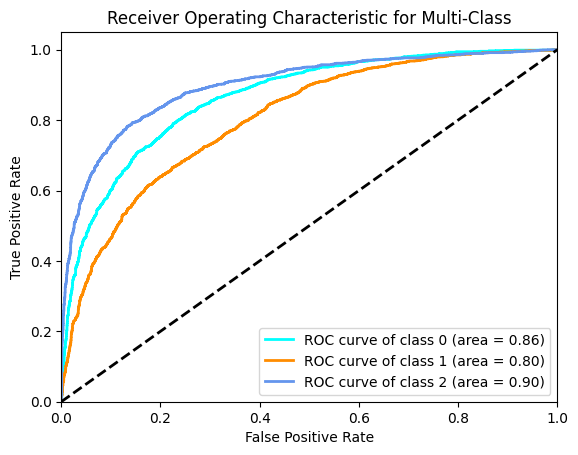

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

n_classes = y_train_onehot.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [28]:
def classify_sentiment(text):
    preprocessed_text = preprocess_text(text)

    text_embeddings = get_avg_embedding(preprocessed_text)

    text_embeddings = np.array(text_embeddings).reshape(1, -1)

    prediction = model_onehot.predict(text_embeddings)

    predicted_class = np.argmax(prediction, axis=1)[0]

    sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    sentiment = sentiment_labels[predicted_class]

    print(f"The sentiment of the text is: {sentiment}")

text = "I want to play."
classify_sentiment(text)
text = "I love this product! It's amazing."
classify_sentiment(text)
text = "I hate this product! It's not amazing."
classify_sentiment(text)

1/1 [==============================] - 0s 37ms/step
The sentiment of the text is: Neutral
1/1 [==============================] - 0s 17ms/step
The sentiment of the text is: Positive
1/1 [==============================] - 0s 17ms/step
The sentiment of the text is: Negative


In [30]:
model_onehot.save('sentiment_analysis_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
